In [33]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

In [34]:
class AgentState(TypedDict):
    number1: int
    number2: int
    operation: str
    finalNumber1: int
    number3: int
    number4: int
    operation2: str
    finalNumber2: int

In [35]:
def adder1(state: AgentState) -> AgentState:
    state['finalNumber1'] = state['number1'] + state['number2']
    return state
def substract1(state: AgentState) -> AgentState:
    state['finalNumber1'] = state['number1'] + state['number2']
    return state
def adder2(state: AgentState) -> AgentState:
    state['finalNumber2'] = state['number3'] + state['number4']
    return state
def substract2(state: AgentState) -> AgentState:
    state['finalNumber2'] = state['number3'] + state['number4']
    return state
def decide_next_node(state: AgentState) -> str:
    if state['operation'] == '+':
        return 'addition_operation'
    elif state['operation'] == '-':
        return 'substraction_operation'
def decide_next_node2(state: AgentState) -> str:
    if state['operation2'] == '+':
        return 'addition_operation2'
    elif state['operation2'] == '-':
        return 'substraction_operation2'

In [36]:
graph = StateGraph(AgentState)
graph.add_node("router", lambda state: state)
graph.add_node("add_node", adder1)
graph.add_node("substract_node", substract1)

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "addition_operation": "add_node",
        "substraction_operation": "substract_node"
    }
)
graph.add_node("router2", lambda state: state)
graph.add_node("add_node2", adder2)
graph.add_node("substract_node2", substract2)

graph.add_edge("add_node", "router2")
graph.add_edge("substract_node", "router2")

graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        "addition_operation2": "add_node2",
        "substraction_operation2": "substract_node2"
    }
)
graph.add_edge("add_node2", END)
graph.add_edge("substract_node2", END)
app = graph.compile()

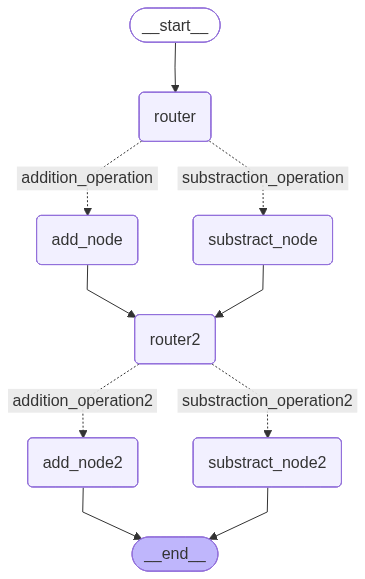

In [37]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [38]:
initial_state = AgentState(
    number1=10,
    operation='-',
    number2=5,
    number3=7,
    number4=2,
    operation2='+',
    finalNumber1=0,
    finalNumber2=0
)
print(app.invoke(initial_state))

{'number1': 10, 'number2': 5, 'operation': '-', 'finalNumber1': 15, 'number3': 7, 'number4': 2, 'operation2': '+', 'finalNumber2': 9}
